<Body>   
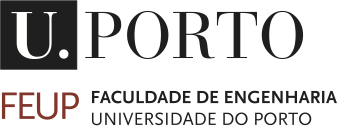   
<h1> <b>Perception and Mapping </b> </h1>
<p><b>Andry Maykol Pinto </b> (amgp@fe.up.pt)</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

# Introducing 3D data processing
One 3D object can be represented using a point cloud, i.e., a set of 3D points where each point is defined by one three-dimensional tuple $(x, y, z)$. Many depth cameras provide raw measurements as 3D point clouds.


This lecture will discuss the basic concepts of 3D data processing, and it will include the following main topics:

* 3D data representation (point clouds, meshes and voxels)
* 3D data formats (PLY and OBJ files)
* Open3D Library
________

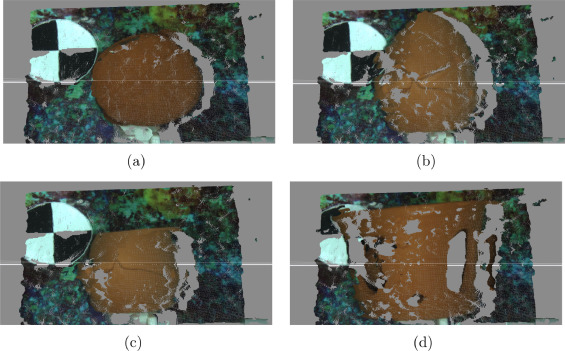

Figure 1 - Point clouds of underwater scenarious.

# The Open3D library


The [Open3D](http://www.open3d.org) library is an open-source library that provides a wide range of tools for 3D data processing. It was initially developed by [researchers at Intel Labs](http://www.open3d.org/wordpress/wp-content/paper.pdf) and is currently written in C++ and Python, and available on multiple platforms, including Windows, Linux, and macOS. The backend is highly optimized and set up for parallelization.


* 3D data structures such as, point clouds, meshes, and images.
* 3D visualization such as, point cloud viewers, mesh viewers, and image viewers.
* 3D data processing such as, filtering, denoising, segmentation, and registration.
* 3D machine learning such as, point cloud classification and segmentation. It suports Pytorch and TtensorFlow

Documentation is available on the [website](http://www.open3d.org/docs/release/index.html#python-api-index).


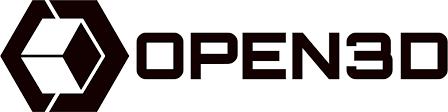

The modules of Open3D include:
* **geometry** provides data structures and algorithms for working with 3D geometric shapes, such as point clouds, meshes, and images.

* **registration** provides algorithms for aligning two or more point clouds or meshes together.

* **visualization** provides tools for visualizing 3D data in a variety of ways, such as point cloud viewers, mesh viewers, and image viewers. The colaboratory does not work very well with this module.

* **ml**  provides tools for machine learning on 3D data, such as point cloud classification and segmentation.

* **io** provides functions for reading and writing 3D data files.

* **utility** provides a variety of utility functions for converting between different coordinate systems and functions for computing geometric properties of 3D shapes.

* **pipelines** provides pipelines for common 3D data processing tasks, such as point cloud cleaning and mesh simplification.

* **contrib** contains contributions from the Open3D community, such as new algorithms and tools.


In [1]:
# Install Open3D library
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Uninst

In [2]:
# Import libraries
import numpy as np
import open3d as o3d

# Visualization
import plotly.graph_objects as go  # plotly to visualize since COLAB does not allow to use O3D functions
import matplotlib.pyplot as plt # or, Matplotlib
from mpl_toolkits import mplot3d

# Data representation
Selecting a data representation is particularly important design decision for many 3D perception systems. These representations include: point clouds; meshes; and, voxels (or octrees). This lecture is focused on point clouds, meshes and voxels.

The 3D processing is challenging for deep learning algorithms since point clouds are unordered and irregular data types. There is no clear and regular definitions for neighboring points for each point - which means, convolutions cannot be (usually) applied to point clouds which may contain different number of 3D points. Therefore, it's more difficult to create mini-batches for training deep learning models.

There are a number of different file extensions that can be used to store point cloud data representations. Some of the most common file extensions include:

* .**pcd**: is the native file format of the Point Cloud Library (PCL). It is a simple and flexible format that can store point cloud data in a variety of formats, including ASCII, binary, and compressed.
* .**ply**: is a general-purpose file format for storing 3D geometric data, a polygon file format, developed at Stanford University. It can be used to store point clouds, meshes, and other types of 3D data. PLY format has both an ASCII version and a binary version.
* .**las**: is a standard file format for storing lidar data. It is a binary format that is optimized for storing large point clouds.
* .**xyz**: is a simple text file format for storing point cloud data. Each line in the file contains the 3D coordinates of a single point.
* .**obj**: is a common file format for storing 3D mesh data. It can also be used to store point clouds.
* .**stl** is a common file format for storing 3D mesh data, and describes only the surface geometry of a three-dimensional object without any representation of color, texture, or other attributes.


Let's discuss the two most frequently used formats to store point clouds and meshes: the PLY, PCD and OBJ.







## Point clouds
The point cloud datatype structure of Open3D is a class called `PointCloud`.

The `PointCloud class` is a vector of 3D points each represented by a Vector3d object, with are many attributes: `points`, `covariances`, `normals`, etc. It also provides also a number of methods for processing and visualizing point clouds, see [documentation](http://www.open3d.org/docs/release/python_api/open3d.geometry.PointCloud.html#open3d.geometry.PointCloud). For instance:
* `transform` or `scale` or `translate` or `rotate`
* `uniform_down_sample` or `voxel_down_sample` or `random_down_sample`
* `remove_statistical_outlier`
* `select_by_index` or `compute_point_cloud_distance`
* `segment_plane` or `crop` or `cluster_dbscan`
* `estimate_normals` or `normalize_normals` or `estimate_point_covariances` or `compute_mean_and_covariance`
* `create_from_depth_image`
* ...

In [33]:
# Create a numpy array of 3D points
pt_np = np.random.rand(1000, 3)

# Create an Open3D point cloud
pt_random        = o3d.geometry.PointCloud()
pt_random.points = o3d.utility.Vector3dVector(pt_np)

# Visualize the point cloud
# o3d.visualization.draw_geometries([pt_random])  # this cannot be used because of the COLAB

Once you have created a point cloud, you can access the 3D points using the `points` attribute.

In [34]:
print('The z-value of the 10th point is', pt_random.points[10][2])

# get the first 5 points in the point cloud:
first_5_points = pt_random.points[:5]
print('The 4th point is:', first_5_points[4])

# print as an np array
print(np.asarray(first_5_points))

The z-value of the 10th point is 0.2169948324291886
The 4th point is: [0.33293091 0.45655148 0.46561091]
[[0.40635835 0.14953402 0.14266725]
 [0.26846526 0.62280071 0.93451595]
 [0.89968791 0.65457793 0.81094626]
 [0.68281852 0.27937365 0.97417728]
 [0.33293091 0.45655148 0.46561091]]


In [5]:
## You can also declare point clouds using Tensor-based geometry defining module.

## Create a empty point cloud on CPU.
#pcd = o3d.t.geometry.PointCloud()
#print(pcd, "\n")

## To create a point cloud on CUDA, specify the device.
# pcd = o3d.t.geometry.PointCloud(o3c.Device("cuda:0"))

## Create a point cloud from open3d tensor with dtype of float32.
#pcd = o3d.t.geometry.PointCloud(o3c.Tensor([[0, 0, 0], [1, 1, 1]], o3c.float32))
#print(pcd, "\n")

## Create a point cloud from open3d tensor with dtype of float64.
#pcd = o3d.t.geometry.PointCloud(o3c.Tensor([[0, 0, 0], [1, 1, 1]], o3c.float64))
#print(pcd, "\n")

## Create a point cloud from numpy array. The array will be copied.
#pcd = o3d.t.geometry.PointCloud(
#    np.array([[0, 0, 0], [1, 1, 1]], dtype=np.float32))
#print(pcd, "\n")

## Create a point cloud from python list.
#pcd = o3d.t.geometry.PointCloud([[0., 0., 0.], [1., 1., 1.]])
#print(pcd, "\n")

## Error creation. The point cloud must have shape of (N, 3).
#try:
#    pcd = o3d.t.geometry.PointCloud(o3c.Tensor([0, 0, 0, 0], o3c.float32))
#except:
#    print(f"Error creation. The point cloud must have shape of (N, 3).")

### Visualizing the point cloud:

The method `draw_geometries` can be used to visualize the point cloud, for instance:
` o3d.visualization.draw_geometries([pt_random],width=1920, height=1080, left=50, top=50)` however, this method does not work directly on colaboratory.
It is possible to use the matplotlib or the plotly libraries for visualize a point cloud in Open3D using the colaboratory.



#### Visualization using Matplotlib

In [6]:
# Visualize point cloud as a scatter plot using matplotlib (as an image!)
def plot_pointcloud_matplotlib_singleview (pt, title_ = ' '):
  colors = None
  if pt.has_colors():
      colors = np.asarray(pt.colors)
  elif pt.has_normals():
      colors = (0.5, 0.5, 0.5) + np.asarray(pt.normals) * 0.5
  else:
      pt.paint_uniform_color((1.0, 0.0, 0.0))
      colors = np.asarray(pt.colors)

  points = np.asarray(pt.points)
  # Single View
  ax = plt.axes(projection='3d')
  ax.view_init(90, -90)
  ax.axis("off")
  ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
  plt.title(title_)
  plt.show()


def plot_pointcloud_matplotlib_multiview (pt, title_ = ' '):
  colors = None
  if pt.has_colors():
      colors = np.asarray(pt.colors)
  elif pt.has_normals():
      colors = (0.5, 0.5, 0.5) + np.asarray(pt.normals) * 0.5
  else:
      pt.paint_uniform_color((1.0, 0.0, 0.0))
      colors = np.asarray(pt.colors)

  points = np.asarray(pt.points)

  # Multi View
  figsize = plt.rcParams.get('figure.figsize')
  fig = plt.figure(figsize=(figsize[0] * 2, figsize[1]))
  ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
  ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
  ax1.axis("off")
  ax1.view_init(90, -90) # front view
  ax1.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
  ax2.axis("off")
  ax2.view_init(90 + 90, -90) # top view
  ax2.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
  plt.title(title_)
  plt.show()

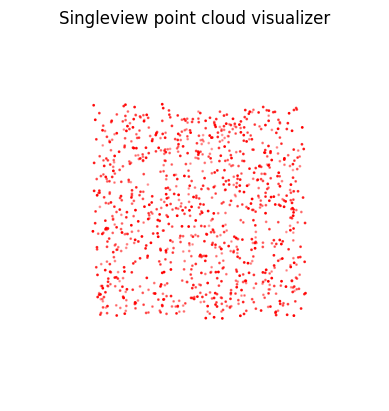

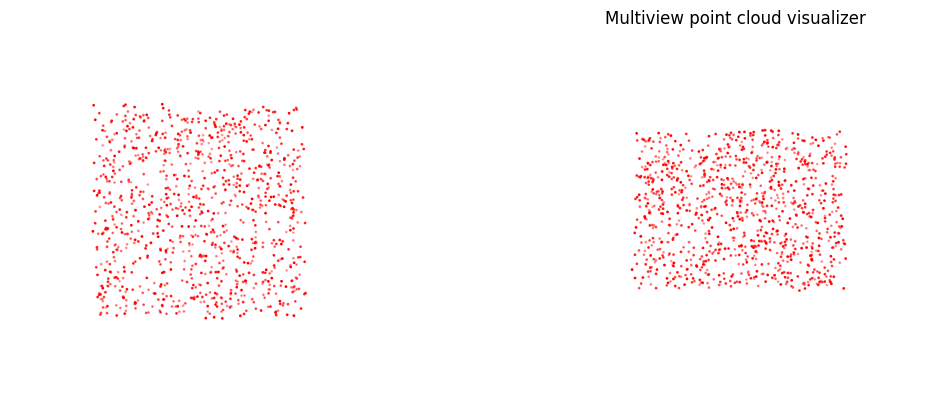

In [7]:
plot_pointcloud_matplotlib_singleview(pt_random, 'Singleview point cloud visualizer')

plot_pointcloud_matplotlib_multiview(pt_random, 'Multiview point cloud visualizer')

#### Visualization using Plotly



In [8]:
def plot_pointcloud_plotly (cloud, title_ = ' '):
  points = np.asarray(cloud.points)

  colors = None
  if cloud.has_colors():
      colors = np.asarray(cloud.colors)
  elif cloud.has_normals():
      colors = (0.5, 0.5, 0.5) + np.asarray(cloud.normals) * 0.5
  else:
      cloud.paint_uniform_color((1.0, 0.0, 0.0))
      colors = np.asarray(cloud.colors)

  fig = go.Figure(
      data=[
          go.Scatter3d(
              x      =points[:,0], y=points[:,1], z=points[:,2],
              mode   = 'markers',
              marker = dict(size=1, color=colors)
          )
      ],
      layout=dict(
          scene=dict(
              xaxis=dict(visible=False),
              yaxis=dict(visible=False),
              zaxis=dict(visible=False)
          )
      )
  )
  fig.show()

In [9]:
#Show a point cloud in Plotly
plot_pointcloud_plotly(pt_random)

Let's develop a more sofisticated function that will help us to draw point clouds, meshes and even VoxelGrids:

In [10]:
def draw_geometries(geometries):
    graph_objects = []

    for geometry in geometries:
        geometry_type = geometry.get_geometry_type()

        if geometry_type == o3d.geometry.Geometry.Type.PointCloud:
            points = np.asarray(geometry.points)
            colors = None
            if geometry.has_colors():
                colors = np.asarray(geometry.colors)
            elif geometry.has_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.normals) * 0.5
                geometry.colors = o3d.utility.Vector3dVector(colors)
            else:
                geometry.paint_uniform_color((1.0, 0.0, 0.0))
                colors = np.asarray(geometry.colors)

            scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=2, color=colors))
            graph_objects.append(scatter_3d)

        if geometry_type == o3d.geometry.Geometry.Type.TriangleMesh:
            triangles = np.asarray(geometry.triangles)
            vertices = np.asarray(geometry.vertices)
            colors = None
            if geometry.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                colors = (1.0, 0.0, 0.0)

            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)

        if geometry_type == o3d.geometry.Geometry.Type.VoxelGrid:
            bounds     = geometry.get_max_bound()-geometry.get_min_bound()

            voxels     = geometry.get_voxels()   # Returns List of Voxel
            vox_mesh   = o3d.geometry.TriangleMesh()

            for v in voxels:
                cube = o3d.geometry.TriangleMesh.create_box(width=1, height=1, depth=1)
                cube.paint_uniform_color(v.color)
                cube.translate(v.grid_index, relative=False)
                vox_mesh += cube

            vox_mesh.translate([0.5,0.5,0.5], relative=True)

            vox_mesh.merge_close_vertices(0.0000001)
            # T=np.array([[1, 0, 0, 0],[0, 0, 1, 0],[0, -1, 0, 0],[0, 0, 0, 1]])
            vox_mesh.translate(geometry.origin, relative=True)

            # Now is like a TriangleMesh
            triangles = np.asarray(vox_mesh.triangles)
            vertices = np.asarray(vox_mesh.vertices)
            colors = None
            if vox_mesh.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(vox_mesh.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                vox_mesh.compute_vertex_normals()
                colors = (0.5, 0.5, 0.5) + np.asarray(vox_mesh.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))                                        # or colors = (0, 0, 0)

            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)

    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False)
            )
        )
    )
    fig.show()

>IMPORTANT:

> Plotly can be used like `o3d.visualization.draw_geometries()` for visualize Open3D geometries: Meshes and Point clouds. If you need to visualize other Open3D geometries in colab, you must implemented it.

In [11]:
o3d.visualization.draw_geometries = draw_geometries # replacing the function of Open3D

In [12]:
o3d.visualization.draw_geometries([pt_random])

### Reading a Point cloud

The Open3D is able to read many formats of point clouds using the `o3d.io.read_point_cloud("my_points.txt", format='XXX')`, where 'XXX' specifies the file type explicitly, see [documentation](http://www.open3d.org/docs/0.9.0/tutorial/Basic/file_io.html#point-cloud).

#### PLY format

PLY files are ASCII or binary files, and they consist of a header and a body. The header contains information about the file format such as, the number of vertices and faces in the object. The body contains the actual data for the object, like the vertex coordinates and face indices.

Here is an example of a PLY file header that specifies a PLY file in ASCII format, version 1.0. It also specifies that the object has 8 vertices and 12 faces. The body of the PLY file contains the actual data for the object, which in this case is the position of each vertex and face of the cube. Each vertex has a position defined by three floating-point numbers (x, y, and z), and each face is defined by a list of three integers (the indices of the vertices that form the face).


```
ply
format ascii 1.0
comment created for the book 3D Deep Learning with Python
element vertex 8
property float32 x
property float32 y
property float32 z
element face 12
property list uint8 int32 vertex_indices
end_header
-1 -1 -1
1 -1 -1
1 1 -1
-1 1 -1
-1 -1 1
1 -1 1
1 1 1
-1 1 1
3 0 1 2
3 5 4 7
3 6 2 1
3 3 7 4
3 7 3 2
3 5 1 0
3 0 2 3
3 5 7 6
3 6 1 5
3 3 4 0
3 7 2 6
3 5 0 4
```





In [13]:
# Download PLY file
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_ujsjF8qMxxt-MEJnDmVtTfq_ROcCFfC' -O cube_ply.ply


--2025-01-10 18:45:28--  https://docs.google.com/uc?export=download&id=1_ujsjF8qMxxt-MEJnDmVtTfq_ROcCFfC
Resolving docs.google.com (docs.google.com)... 142.250.99.100, 142.250.99.113, 142.250.99.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1_ujsjF8qMxxt-MEJnDmVtTfq_ROcCFfC&export=download [following]
--2025-01-10 18:45:28--  https://drive.usercontent.google.com/download?id=1_ujsjF8qMxxt-MEJnDmVtTfq_ROcCFfC&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376 [application/octet-stream]
Saving to: ‘cube_ply.ply’

cube_ply.ply        100%[===================>]     376  --.-KB/s    in 0s      

2

In [14]:
#Load PLY
# Load a PCD file as a point cloud
cloud_cube_ply = o3d.io.read_point_cloud("cube_ply.ply", format='ply')
if cloud_cube_ply.is_empty():
  exit()

# Show the point cloud
o3d.visualization.draw_geometries([cloud_cube_ply])

#### PCD format
PCD files are ASCII or binary files, and they consist of a header and a body. The header contains information about the file format such as, the number of points in the point cloud and the data types of the point cloud properties. The body contains the actual data for the point cloud: the point coordinates and other properties such as, color and normal vectors.

This example is declaring a point cloud with 1000 points, each point with XYZ coordinates and the surface normals XYZ. It's being reserved 4 bytes for each dimension size in floating-point (F) representation type.


```
# PCD v0.7 - Point Cloud Data file format
VERSION 0.7
FIELDS x y z normal_x normal_y normal_z  # XYZ + surface normals
SIZE 4 4 4 4 4 4
TYPE F F F F F F
COUNT 1 1 1 1 1 1
WIDTH 1
HEIGHT 1000
VIEWPOINT 0 0 0 1 0 0 0
# Point cloud data
0.1 0.2 0.3 0.0 0.0 1.0
0.4 0.5 0.6 1.0 0.0 0.0
0.7 0.8 0.9 0.0 1.0 0.0
...
0.99 0.98 0.97 0.0 -1.0 0.0
```




In [15]:
# Download bunny
!wget https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd

--2025-01-10 18:45:31--  https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10878 (11K) [text/plain]
Saving to: ‘bunny.pcd’

bunny.pcd           100%[===================>]  10.62K  --.-KB/s    in 0.001s  

2025-01-10 18:45:31 (17.6 MB/s) - ‘bunny.pcd’ saved [10878/10878]



In [16]:
# Load a PCD file as a point cloud
cloud_bunny = o3d.io.read_point_cloud("bunny.pcd")
if cloud_bunny.is_empty():
  exit()

# Show the point cloud
o3d.visualization.draw_geometries([cloud_bunny])

## Meshes

Similar to the Point clouds, this library contains a data representation type for 3D Meshes namely, `open3d.geometry.MeshBase` or `open3d.geometry.TriangleMesh` or `open3d.geometry.TetraMesh`, `open3d.geometry.TriangleMesh`, with the following attributes: `vertices`, `vertex_normals`, `vertex_colors`,  `triangles`, `triangle_normals`, etc.

* **MeshBase** is the base class for all mesh types in Open3D. It provides common functionality for all meshes, such as loading and saving meshes, computing geometric properties of meshes, and visualizing meshes.

* **Tetrahedral** meshes are made up of tetrahedrons, which are four-sided pyramids. Tetrahedral meshes are often used for volume meshing and finite element analysis.

* **HalfEdgeTriangleMesh** is a class that represents triangle meshes using a *doubly connected edge list*, which in addition to the usual vertices, edges, and faces that make up a polygon mesh it encodes a pointer to the next half-edge and previous half-edge of the same face. Each half-edge also has a pointer to its origin vertex (the destination vertex can be obtained by querying the origin of its twin, or of the next half-edge).


Relevant methods include:
* `has_vertices`, `compute_vertex_normals`
* `compute_triangle_normals`, `normalize_normals`
* `filter_sharpen`, `filter_smooth_simple` `simplify_vertex_clustering`
* `get_surface_area`, `get_volume`

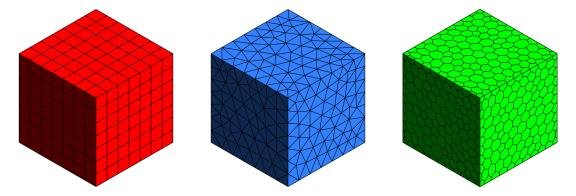

Figure 2 - Hexahedral-left, Tetrahedral-center, Polyhedral-right meshes. credits: Marcin Sosnowski

#### Reading a Mesh

Open3D can import a mesh file using the function `o3d.io.read_triangle_mesh('filename')`. By default, Open3D tries to infer the file type by the filename extension: ply, stl, obj, off and gltf. Additional information is available on the [documentation](http://www.open3d.org/docs/0.9.0/tutorial/Basic/file_io.html)




##### OBJ format

The OBJ file has both ASCII and binary versions (the last one is proprietary and undocumented). The header specified the Material Template Library (MTL) that describes the surface shadding properties, defined in `./cube.mtl ` file, which is followed by the declaration of an object (`o cube`) named 'cube'.
Each line represents a different part of the object such as, a vertex (`v`), a face (`f`) or a material (`usemtl XPTO`).


```
mtllib ./cube.mtl
o cube

# Vertex list
v -0.5 -0.5 0.5
v -0.5 -0.5 -0.5
v -0.5 0.5 -0.5
v -0.5 0.5 0.5
v 0.5 -0.5 0.5
v 0.5 -0.5 -0.5
v 0.5 0.5 -0.5
v 0.5 0.5 0.5

# Point/Line/Face list
usemtl Door
f 1 2 3
f 6 5 8
f 7 3 2
f 4 8 5
f 8 4 3
f 6 2 1
f 1 3 4
f 6 8 7
f 7 2 6
f 4 5 1
f 8 3 7
f 6 1 5
```

The file `./cube.mtl ` is defined as:
```
newmtl Door
Ka  0.8 0.6 0.4
Kd  0.8 0.6 0.4
Ks  0.9 0.9 0.9
d  1.0
Ns  0.0
illum 2
```
where `Ka` is ambient color, `Kd` is diffuse color, `Ks` is specular color, `illum` is the illumination model, `Ni` is the index of refraction, etc.


In [17]:
# Download an OBJ file
!wget https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj

--2025-01-10 18:45:31--  https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj
Resolving graphics.stanford.edu (graphics.stanford.edu)... 171.67.77.70
Connecting to graphics.stanford.edu (graphics.stanford.edu)|171.67.77.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205917 (201K) [text/plain]
Saving to: ‘bunny.obj’

bunny.obj           100%[===================>] 201.09K  --.-KB/s    in 0.1s    

2025-01-10 18:45:32 (1.36 MB/s) - ‘bunny.obj’ saved [205917/205917]




To load a mesh file, Open3D uses the function `open3d.io.read_triangle_mesh`, see [documentation](http://www.open3d.org/docs/release/python_api/open3d.io.read_triangle_mesh.html).



In [18]:
# Loading mesh
mesh_bunny = o3d.io.read_triangle_mesh("bunny.obj")
if mesh_bunny.is_empty(): exit()

print(mesh_bunny)
print(np.asarray(mesh_bunny.vertices))
print(np.asarray(mesh_bunny.triangles))

# Show the mesh: no normals --> gray bunny
o3d.visualization.draw_geometries([mesh_bunny])

TriangleMesh with 2503 points and 4968 triangles.
[[-0.08656193  0.14249188  0.00843268]
 [-0.08969839  0.13971257  0.01377476]
 [-0.08949102  0.14392582  0.01248849]
 ...
 [-0.02785147  0.03840433 -0.01721042]
 [-0.03863927  0.03393731  0.00855065]
 [-0.0550398   0.0573097   0.0169909 ]]
[[   0    1    2]
 [   3    4    5]
 [   6    7    8]
 ...
 [ 389  388 2502]
 [ 388 1415 2502]
 [1415 1686 2502]]


It is also possible to calculate the normal vectors for the surface, eg., by taking into consideration the vertexes of the mesh.
The attribute `normals` is an float64 array of shape (num_points, 3) and the `numpy.asarray()` is used to access data.

In [36]:
if not mesh_bunny.has_vertex_normals():
  mesh_bunny.compute_vertex_normals()

if not mesh_bunny.has_triangle_normals():
  mesh_bunny.compute_triangle_normals()

# Show the point cloud
o3d.visualization.draw_geometries([mesh_bunny])

# NO COLAB:: Visualize the point cloud with normal vectors
#o3d.visualization.draw_geometries([mesh_bunny], point_show_normal=True)

## Voxels

Voxels are 3D pixels. They are a way of representing 3D data in a discrete and regular grid. Each voxel in the grid has a value, which can represent a variety of different properties, such as the density of the material at that point, or the color of the object.
Open3D has a type `open3d.geometry.VoxelGrid` that can be used to work with voxel grids, see [documentation](http://www.open3d.org/docs/release/python_api/open3d.geometry.VoxelGrid.html).


### From point clouds

In [20]:
# Download point cloud
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=113mbufGQLLnM_vsz80gl48mmN-2Wj_rH' -O armadilho.ply

--2025-01-10 18:45:32--  https://docs.google.com/uc?export=download&id=113mbufGQLLnM_vsz80gl48mmN-2Wj_rH
Resolving docs.google.com (docs.google.com)... 142.250.99.100, 142.250.99.113, 142.250.99.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=113mbufGQLLnM_vsz80gl48mmN-2Wj_rH&export=download [following]
--2025-01-10 18:45:32--  https://drive.usercontent.google.com/download?id=113mbufGQLLnM_vsz80gl48mmN-2Wj_rH&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6919168 (6.6M) [application/octet-stream]
Saving to: ‘armadilho.ply’

armadilho.ply       100%[===================>]   6.60M  16.2MB/s    in

In [21]:
# Load a PCD file as a point cloud
cloud_arm = o3d.io.read_point_cloud("armadilho.ply")
if cloud_arm.is_empty():  exit()

#Computer normals
if not cloud_arm.has_normals():
  cloud_arm.estimate_normals()

In [22]:
# Fit the Point cloud to a Unit cube
cloud_arm.scale(1 / np.max(cloud_arm.get_max_bound() - cloud_arm.get_min_bound()),
          center=cloud_arm.get_center())

#cloud_arm.colors = o3d.utility.Vector3dVector(np.random.uniform(0, 1, size=(N, 3)))

# Show the point cloud
o3d.visualization.draw_geometries([cloud_arm])

Output hidden; open in https://colab.research.google.com to view.

The VoxelGrid can be created from a point cloud using the method `create_from_point_cloud`. It is an array of voxels from the `open3d.geometry.Voxel class`, see [documentation](http://www.open3d.org/docs/release/python_api/open3d.geometry.Voxel.html). A voxel is a 3D pixel, and it is a way of representing 3D data in a discrete and regular grid. In a VoxelGrid, a voxel is occupied if at least one point of the point cloud is within the voxel. The argument `voxel_size` defines the resolution of the voxel grid.

Note: the colaboratory cannot draw voxels directly from the Open3D functions, therefore, let's continue using our version of the `draw_geometries` function.

In [23]:
# Create VoxelGrid
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(cloud_arm, voxel_size=0.05)

In [24]:
# Show VoxelGrid
o3d.visualization.draw_geometries([voxel_grid])

# Exercise 1

Normals are vectors that indicate the direction of the surface and thus, they are perpendicular to the surface of the object represented by the point cloud at each point. Normals are essential for various tasks, including object recognition, 3D reconstruction, lighting calculations, and rendering. Normals help in understanding the shape and structure of objects in the scene.
Calculating the normal at a 3D point in a point cloud typically involves estimating the surface orientation in the vicinity of the point. One common approach is to fit a plane to a set of neighboring points and derive the normal vector from that plane.


a) Use the eigenvalue decomposition of the covariance matrix to calculate the normal vector of the 10th 3D point ($[0.0079813, 0.12438, 0.032798 ]$) from the point cloud depicted in 'bunny.pcd' file.

b) Calculate the normal vector for the same point but using the Open3D library and compare this outcome with the previous result.

c) Load the mesh 'bunny.obj' and convert it to a point cloud.

d) Compute its convex hull of the 'bunny.obj'.

e) Compute the volume and surface area of the mesh 'knot.ply'.

f) Compute the vertex normals and triangle normals for the mesh 'knot.ply'. Discuss the results.


In [37]:
#a)

import numpy as np

# Define the 3D point cloud as an array of (x, y, z) coordinates
point_cloud = np.asarray(cloud_bunny.points)

# Define the target point for which you want to calculate the normal
target_point = point_cloud[10]

# Step 1: Calculate Euclidean distance from the target point to all other points
distances = np.linalg.norm(point_cloud - target_point, axis=1)

# Step 2: Define a distance threshold (you can adjust this based on your data)
distance_threshold = 0.01  # Adjust this threshold value based on your data

# Step 3: Find the indices of points within the distance threshold
neighbor_indices = np.where(distances < distance_threshold)[0]

# Step 4: Extract the neighboring points
neighbors = point_cloud[neighbor_indices]

# Step 2: Calculate the covariance matrix
mean = np.mean(neighbors, axis=0)
centered_points = neighbors - mean
cov_matrix = np.cov(centered_points.T)

# Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: The eigenvector corresponding to the lowest eigenvalue is the normal
normal = eigenvectors[:, np.argmin(eigenvalues)]

# Normalize the normal vector
normal = normal / np.linalg.norm(normal)

# The normal vector is now calculated and represents the surface orientation at the target point
print("Normal vector calculated manually:", normal/np.abs(normal).sum())

Normal vector calculated manually: [-0.08925469 -0.46228967 -0.44845563]


In [38]:
#b)

# Estimate normals of the point cloud using KDTreeSearchParamRadius
cloud_bunny.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamRadius(radius=0.01))

# Access the normal of a specific point (e.g., the 10th point)
cloud_bunny_normals_np = cloud_bunny.normals[:]
print(cloud_bunny_normals_np)
print("Normal vector from Open3D:", cloud_bunny_normals_np[10]/np.abs(cloud_bunny_normals_np[10]).sum())

std::vector<Eigen::Vector3d> with 397 elements.
Use numpy.asarray() to access data.
Normal vector from Open3D: [-0.08925469 -0.46228967 -0.44845563]


In [27]:
# Extra

# Assume target_point_index is the index of the point we want to highlight
target_point_index = 10

# Set the colors for the whole point cloud
cloud_bunny.paint_uniform_color([0.5, 0.5, 0.5])  # Set the default color for all points

# Change the color of the specific target point to red
cloud_bunny.colors[target_point_index] = [1, 0, 0]  # RGB for red

print(target_point)
# Show the point cloud
o3d.visualization.draw_geometries([cloud_bunny]) # visualize the normals by pressing n in the visualizer.

[0.0079813 0.12438   0.032798 ]


In [28]:
# c)
# Load the mesh
mesh = o3d.io.read_triangle_mesh("bunny.obj")

# Convert to point cloud
point_cloud_from_mesh = mesh.sample_points_uniformly(number_of_points=1000)  # Sample points
print("Point cloud from mesh has", len(np.asarray(point_cloud_from_mesh.points)), "points.")

# Show the point cloud
o3d.visualization.draw_geometries([point_cloud_from_mesh])

Point cloud from mesh has 1000 points.


In [29]:
# d)
# Compute convex hull
convexHull, _ = mesh.compute_convex_hull()
print("Convex hull computed with", len(np.asarray(convexHull.triangles)), "triangles.")
o3d.visualization.draw_geometries([convexHull])

Convex hull computed with 650 triangles.


In [30]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=12VnUihN6QUvOVqQrd7tQw6chWBxmvNC4' -O knot.ply

--2025-01-10 18:45:42--  https://docs.google.com/uc?export=download&id=12VnUihN6QUvOVqQrd7tQw6chWBxmvNC4
Resolving docs.google.com (docs.google.com)... 142.250.99.100, 142.250.99.113, 142.250.99.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12VnUihN6QUvOVqQrd7tQw6chWBxmvNC4&export=download [following]
--2025-01-10 18:45:42--  https://drive.usercontent.google.com/download?id=12VnUihN6QUvOVqQrd7tQw6chWBxmvNC4&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.135.132, 2607:f8b0:400e:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.135.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54920 (54K) [application/octet-stream]
Saving to: ‘knot.ply’

knot.ply            100%[===================>]  53.63K  --.-KB/s    in 0.001s 

In [31]:
# e)
# Load the knot mesh
mesh_knot = o3d.io.read_triangle_mesh("knot.ply")

# Compute volume and surface area
volume = mesh_knot.get_volume()
area = mesh_knot.get_surface_area()
print("Volume of knot mesh:", volume)
print("Surface area of knot mesh:", area)


o3d.visualization.draw_geometries([mesh_knot])

Volume of knot mesh: 1053504.8262222076
Surface area of knot mesh: 112072.277931022


In [32]:
# f)

# Compute vertex normals
mesh_knot.compute_vertex_normals()
vertex_normals = np.asarray(mesh_knot.vertex_normals)
print("Vertex Normals Computed:", vertex_normals.shape)

# Compute triangle normals
triangle_normals = np.asarray(mesh_knot.triangle_normals)
print("Triangle Normals Computed:", triangle_normals.shape)

# Discuss the results
print("Vertex Normals:", vertex_normals)
print("Triangle Normals:", triangle_normals)

Vertex Normals Computed: (1440, 3)
Triangle Normals Computed: (2880, 3)
Vertex Normals: [[ 0.71996314 -0.69384231  0.01535991]
 [ 0.87288229 -0.33468354  0.35505412]
 [ 0.79410635  0.11003318  0.59773556]
 ...
 [-0.51301209 -0.39281502 -0.76322667]
 [-0.08428252 -0.69869998 -0.71043282]
 [ 0.36951031 -0.80973293 -0.45584505]]
Triangle Normals: [[ 0.79164373 -0.53951444  0.28674793]
 [ 0.8319824  -0.53303008  0.15389681]
 [ 0.83488162 -0.09250101  0.54260136]
 ...
 [ 0.16269924 -0.76215917 -0.6266118 ]
 [ 0.52755226 -0.83707495 -0.14489352]
 [ 0.56778973 -0.76467734 -0.30476777]]
